In [221]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler # 이상치에 둔감한 Scaling 기법

%matplotlib inline
normalizer = RobustScaler()

train= pd.read_csv('서울시 차량도로망 음영 최종적용 5181.csv',encoding='EUC-KR')
test = pd.read_csv('서울시 차량도로망 음영 최종적용 5181.csv', encoding ='EUC-KR')

merge_car_per=pd.read_csv("서울시 차량도로 데이터_total_set.csv",encoding = 'EUC-KR')
labelvalue = pd.read_csv('EPDO합산_PK별.csv',encoding='EUC-KR')
data_norm = train.copy() 


In [222]:
train

,NTFC_DE,index,sinho,jaesulham,pk,RN,SIG_CD_PK,RDS_MAN_NO,RN_CD,ROAD_BT,...,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCLN,SOIL_INCL_,bus,UHL,DN,Shading
0,20100610,0,0,0,112601518,용마공원로4길,11260,1518,4118463,2.000,...,4,1,30,0,2-7%,2,0,0,0,2
1,20100422,1,1,0,11290409,한천로,11290,409,3005038,2.000,...,3,2,50,20313,0-2%,1,1,0,0,0
2,20100617,2,0,0,112305,경희대로1길,11230,5,4115019,6.000,...,4,1,30,0,7-15%,3,0,0,13,5
3,20100617,3,0,0,112302942,홍릉로1가길,11230,2942,4115654,1.000,...,4,1,30,0,2-7%,2,0,0,0,1
4,20100610,4,0,0,112901560,장위로40길,11290,1560,4121578,5.000,...,4,1,30,0,15-30%,4,0,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,20131230,67531,1,0,112604587,신내역로1길,11260,4587,4118589,5.800,...,4,1,30,0,2-7%,2,0,0,31,1
67357,20201022,67533,0,0,117105883,위례서이로,11710,5883,3353116,20.000,...,3,0,50,0,15-30%,4,2,0,50,8
67358,20100630,67547,0,0,117404339,성내로14길,11740,4339,4172163,8.003,...,4,1,30,0,0-2%,1,0,0,0,10
67359,20101208,67555,0,0,117404359,상일로21길,11740,4359,4172152,6.000,...,4,1,30,0,2-7%,2,0,0,22,5


In [223]:
car_per=merge_car_per.loc[:,['pk','CAR_PER_RD']]
#train_numeric=train_final.loc[:,['sinho','jaesulham','DN','Shading','EPDO']]


In [224]:
a_t = pd.merge(train,car_per, how='inner',on='pk')

In [225]:
a_t

,NTFC_DE,index,sinho,jaesulham,pk,RN,SIG_CD_PK,RDS_MAN_NO,RN_CD,ROAD_BT,...,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCLN,SOIL_INCL_,bus,UHL,DN,Shading,CAR_PER_RD
0,20100610,0,0,0,112601518,용마공원로4길,11260,1518,4118463,2.000,...,1,30,0,2-7%,2,0,0,0,2,0.088568
1,20100422,1,1,0,11290409,한천로,11290,409,3005038,2.000,...,2,50,20313,0-2%,1,1,0,0,0,0.122073
2,20100617,2,0,0,112305,경희대로1길,11230,5,4115019,6.000,...,1,30,0,7-15%,3,0,0,13,5,0.353479
3,20100617,3,0,0,112302942,홍릉로1가길,11230,2942,4115654,1.000,...,1,30,0,2-7%,2,0,0,0,1,0.058913
4,20100610,4,0,0,112901560,장위로40길,11290,1560,4121578,5.000,...,1,30,0,15-30%,4,0,0,22,0,0.305183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,20131230,67531,1,0,112604587,신내역로1길,11260,4587,4118589,5.800,...,1,30,0,2-7%,2,0,0,31,1,0.256848
67357,20201022,67533,0,0,117105883,위례서이로,11710,5883,3353116,20.000,...,0,50,0,15-30%,4,2,0,50,8,4.007233
67358,20100630,67547,0,0,117404339,성내로14길,11740,4339,4172163,8.003,...,1,30,0,0-2%,1,0,0,0,10,1.010736
67359,20101208,67555,0,0,117404359,상일로21길,11740,4359,4172152,6.000,...,1,30,0,2-7%,2,0,0,22,5,0.757768


In [178]:
train.head()

,NTFC_DE,index,sinho,jaesulham,pk,RN,SIG_CD_PK,RDS_MAN_NO,RN_CD,ROAD_BT,...,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCLN,SOIL_INCL_,bus,UHL,DN,Shading
0,20100610,0,0,0,112601518,용마공원로4길,11260,1518,4118463,2.0,...,4,1,30,0,2-7%,2,0,0,0,2
1,20100422,1,1,0,11290409,한천로,11290,409,3005038,2.0,...,3,2,50,20313,0-2%,1,1,0,0,0
2,20100617,2,0,0,112305,경희대로1길,11230,5,4115019,6.0,...,4,1,30,0,7-15%,3,0,0,13,5
3,20100617,3,0,0,112302942,홍릉로1가길,11230,2942,4115654,1.0,...,4,1,30,0,2-7%,2,0,0,0,1
4,20100610,4,0,0,112901560,장위로40길,11290,1560,4121578,5.0,...,4,1,30,0,15-30%,4,0,0,22,0


In [179]:
a_t.isnull().sum()

NTFC_DE       0
index         0
sinho         0
jaesulham     0
pk            0
RN            0
SIG_CD_PK     0
RDS_MAN_NO    0
RN_CD         0
ROAD_BT       0
ROAD_LT       0
ROA_CLS_SE    0
RDS_DPN_SE    0
SPD_LMT       0
DNGR_CD       0
SOIL_INCLN    0
SOIL_INCL_    0
bus           0
UHL           0
DN            0
Shading       0
CAR_PER_RD    0
dtype: int64

In [180]:
train.info()           # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67361 entries, 0 to 67360
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NTFC_DE     67361 non-null  int64  
 1   index       67361 non-null  int64  
 2   sinho       67361 non-null  int64  
 3   jaesulham   67361 non-null  int64  
 4   pk          67361 non-null  int64  
 5   RN          67361 non-null  object 
 6   SIG_CD_PK   67361 non-null  int64  
 7   RDS_MAN_NO  67361 non-null  int64  
 8   RN_CD       67361 non-null  int64  
 9   ROAD_BT     67361 non-null  float64
 10  ROAD_LT     67361 non-null  float64
 11  ROA_CLS_SE  67361 non-null  int64  
 12  RDS_DPN_SE  67361 non-null  int64  
 13  SPD_LMT     67361 non-null  int64  
 14  DNGR_CD     67361 non-null  int64  
 15  SOIL_INCLN  67361 non-null  object 
 16  SOIL_INCL_  67361 non-null  int64  
 17  bus         67361 non-null  int64  
 18  UHL         67361 non-null  int64  
 19  DN          67361 non-nul

In [181]:
train.isnull().sum()   #각 Column별 NULL 값 개수 확인  

NTFC_DE       0
index         0
sinho         0
jaesulham     0
pk            0
RN            0
SIG_CD_PK     0
RDS_MAN_NO    0
RN_CD         0
ROAD_BT       0
ROAD_LT       0
ROA_CLS_SE    0
RDS_DPN_SE    0
SPD_LMT       0
DNGR_CD       0
SOIL_INCLN    0
SOIL_INCL_    0
bus           0
UHL           0
DN            0
Shading       0
dtype: int64

In [226]:
test_set = a_t

In [227]:
test_set

,NTFC_DE,index,sinho,jaesulham,pk,RN,SIG_CD_PK,RDS_MAN_NO,RN_CD,ROAD_BT,...,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCLN,SOIL_INCL_,bus,UHL,DN,Shading,CAR_PER_RD
0,20100610,0,0,0,112601518,용마공원로4길,11260,1518,4118463,2.000,...,1,30,0,2-7%,2,0,0,0,2,0.088568
1,20100422,1,1,0,11290409,한천로,11290,409,3005038,2.000,...,2,50,20313,0-2%,1,1,0,0,0,0.122073
2,20100617,2,0,0,112305,경희대로1길,11230,5,4115019,6.000,...,1,30,0,7-15%,3,0,0,13,5,0.353479
3,20100617,3,0,0,112302942,홍릉로1가길,11230,2942,4115654,1.000,...,1,30,0,2-7%,2,0,0,0,1,0.058913
4,20100610,4,0,0,112901560,장위로40길,11290,1560,4121578,5.000,...,1,30,0,15-30%,4,0,0,22,0,0.305183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,20131230,67531,1,0,112604587,신내역로1길,11260,4587,4118589,5.800,...,1,30,0,2-7%,2,0,0,31,1,0.256848
67357,20201022,67533,0,0,117105883,위례서이로,11710,5883,3353116,20.000,...,0,50,0,15-30%,4,2,0,50,8,4.007233
67358,20100630,67547,0,0,117404339,성내로14길,11740,4339,4172163,8.003,...,1,30,0,0-2%,1,0,0,0,10,1.010736
67359,20101208,67555,0,0,117404359,상일로21길,11740,4359,4172152,6.000,...,1,30,0,2-7%,2,0,0,22,5,0.757768


In [228]:
merge_outer['EPDO']=merge_outer['EPDO'].fillna(0)

In [229]:
merge_outer

,NTFC_DE,index,sinho,jaesulham,pk,RN,SIG_CD_PK,RDS_MAN_NO,RN_CD,ROAD_BT,...,SPD_LMT,DNGR_CD,SOIL_INCLN,SOIL_INCL_,bus,UHL,DN,Shading,CAR_PER_RD,EPDO
0,20100610,0,0,0,112601518,용마공원로4길,11260,1518,4118463,2.000,...,30,0,2-7%,2,0,0,0,2,0.088568,6.0
1,20100422,1,1,0,11290409,한천로,11290,409,3005038,2.000,...,50,20313,0-2%,1,1,0,0,0,0.122073,0.0
2,20100617,2,0,0,112305,경희대로1길,11230,5,4115019,6.000,...,30,0,7-15%,3,0,0,13,5,0.353479,0.0
3,20100617,3,0,0,112302942,홍릉로1가길,11230,2942,4115654,1.000,...,30,0,2-7%,2,0,0,0,1,0.058913,0.0
4,20100610,4,0,0,112901560,장위로40길,11290,1560,4121578,5.000,...,30,0,15-30%,4,0,0,22,0,0.305183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,20131230,67531,1,0,112604587,신내역로1길,11260,4587,4118589,5.800,...,30,0,2-7%,2,0,0,31,1,0.256848,0.0
67357,20201022,67533,0,0,117105883,위례서이로,11710,5883,3353116,20.000,...,50,0,15-30%,4,2,0,50,8,4.007233,0.0
67358,20100630,67547,0,0,117404339,성내로14길,11740,4339,4172163,8.003,...,30,0,0-2%,1,0,0,0,10,1.010736,0.0
67359,20101208,67555,0,0,117404359,상일로21길,11740,4359,4172152,6.000,...,30,0,2-7%,2,0,0,22,5,0.757768,0.0


In [279]:
def train_drop(data_norm):
    return data_norm.drop(['NTFC_DE','index','pk','RN','SIG_CD_PK','RDS_MAN_NO','RN_CD','SOIL_INCLN'],axis=1,inplace=False)


In [231]:
def test_drop(data_norm):
    return data_norm.drop(['NTFC_DE','index','ROAD_BT','ROAD_LT','bus','pk','RN','SIG_CD_PK','RDS_MAN_NO','RN_CD','SOIL_INCLN'],axis=1,inplace=False)


In [209]:
def log_preprocessing(data_norm,name):
    data_array = normalizer.fit_transform(np.log1p(data_norm.iloc[:,data_norm.columns==name])) #log함수 적용
    df_data_array=pd.DataFrame(data_array)
    return df_data_array

In [232]:
train_final=train_drop(merge_outer)

In [280]:
train_exam1=train_drop(merge_outer)

In [281]:
train_exam1

,sinho,jaesulham,ROAD_BT,ROAD_LT,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,bus,UHL,DN,Shading,CAR_PER_RD,EPDO
0,0,0,2.000,21.000,4,1,30,0,2,0,0,0,2,0.088568,6.0
1,1,0,2.000,11840.000,3,2,50,20313,1,1,0,0,0,0.122073,0.0
2,0,0,6.000,109.000,4,1,30,0,3,0,0,13,5,0.353479,0.0
3,0,0,1.000,31.000,4,1,30,0,2,0,0,0,1,0.058913,0.0
4,0,0,5.000,12.000,4,1,30,0,4,0,0,22,0,0.305183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,1,0,5.800,74.000,4,1,30,0,2,0,0,31,1,0.256848,0.0
67357,0,0,20.000,341.000,3,0,50,0,4,2,0,50,8,4.007233,0.0
67358,0,0,8.003,120.459,4,1,30,0,1,0,0,0,10,1.010736,0.0
67359,0,0,6.000,82.638,4,1,30,0,2,0,0,22,5,0.757768,0.0


In [233]:
# train_final['EPDO']=log_preprocessing(train_final,'EPDO')
test_final=test_drop(test_set)

In [234]:
train_final

,sinho,jaesulham,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,UHL,DN,Shading,CAR_PER_RD,EPDO
0,0,0,4,1,30,0,2,0,0,2,0.088568,6.0
1,1,0,3,2,50,20313,1,0,0,0,0.122073,0.0
2,0,0,4,1,30,0,3,0,13,5,0.353479,0.0
3,0,0,4,1,30,0,2,0,0,1,0.058913,0.0
4,0,0,4,1,30,0,4,0,22,0,0.305183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67356,1,0,4,1,30,0,2,0,31,1,0.256848,0.0
67357,0,0,3,0,50,0,4,0,50,8,4.007233,0.0
67358,0,0,4,1,30,0,1,0,0,10,1.010736,0.0
67359,0,0,4,1,30,0,2,0,22,5,0.757768,0.0


In [293]:
test_final

,sinho,jaesulham,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,UHL,DN,Shading,CAR_PER_RD
0,0,0,4,1,30,0,2,0,0,2,0.088568
1,1,0,3,2,50,20313,1,0,0,0,0.122073
2,0,0,4,1,30,0,3,0,13,5,0.353479
3,0,0,4,1,30,0,2,0,0,1,0.058913
4,0,0,4,1,30,0,4,0,22,0,0.305183
...,...,...,...,...,...,...,...,...,...,...,...
67356,1,0,4,1,30,0,2,0,31,1,0.256848
67357,0,0,3,0,50,0,4,0,50,8,4.007233
67358,0,0,4,1,30,0,1,0,0,10,1.010736
67359,0,0,4,1,30,0,2,0,22,5,0.757768


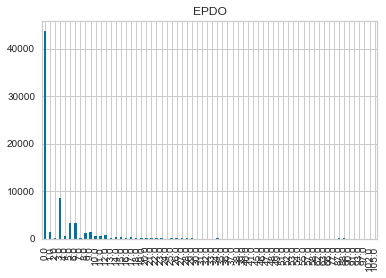

In [236]:
train_final['EPDO'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('EPDO')
plt.show()

In [237]:
train_numeric=train_final.loc[:,['sinho','jaesulham','DN','Shading','CAR_PER_RD','EPDO']]
train_categorical = train_final.loc[:,['ROA_CLS_SE','RDS_DPN_SE','SPD_LMT','DNGR_CD','SOIL_INCL_','UHL','EPDO']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ROAD_BT', 'ROAD_LT'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [238]:
train_categorical

,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,UHL,EPDO
0,4,1,30,0,2,0,6.0
1,3,2,50,20313,1,0,0.0
2,4,1,30,0,3,0,0.0
3,4,1,30,0,2,0,0.0
4,4,1,30,0,4,0,0.0
...,...,...,...,...,...,...,...
67356,4,1,30,0,2,0,0.0
67357,3,0,50,0,4,0,0.0
67358,4,1,30,0,1,0,0.0
67359,4,1,30,0,2,0,0.0


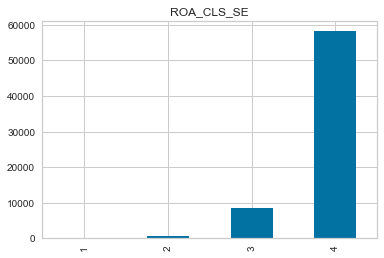

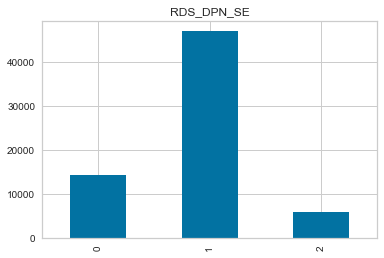

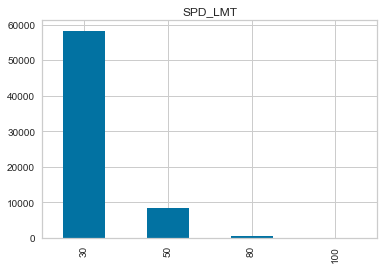

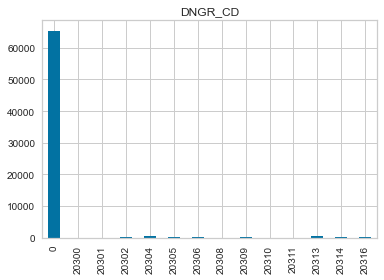

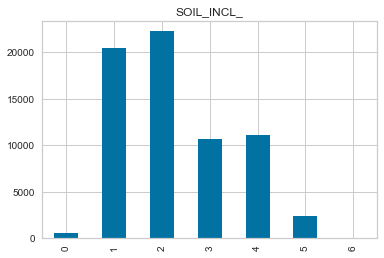

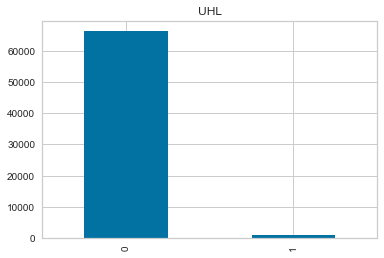

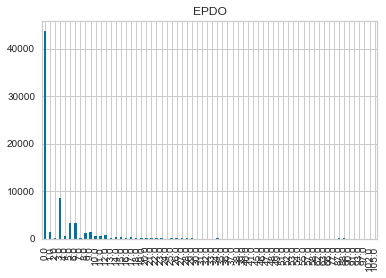

In [239]:
for col in train_categorical.columns:
    train_categorical[col].value_counts().sort_index(ascending=True).plot(kind='bar')
    plt.title(col)
    plt.show()




In [38]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
OH_train = onehot_encoder.fit_transform(train_categorical)
print(OH_train)
# print(onehot_encoder.categories_)

  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 11)	1.0
  (0, 27)	1.0
  (0, 32)	1.0
  (0, 40)	1.0
  (1, 2)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 22)	1.0
  (1, 26)	1.0
  (1, 32)	1.0
  (1, 34)	1.0
  (2, 3)	1.0
  (2, 5)	1.0
  (2, 7)	1.0
  (2, 11)	1.0
  (2, 28)	1.0
  (2, 32)	1.0
  (2, 34)	1.0
  (3, 3)	1.0
  (3, 5)	1.0
  (3, 7)	1.0
  (3, 11)	1.0
  :	:
  (67357, 11)	1.0
  (67357, 29)	1.0
  (67357, 32)	1.0
  (67357, 34)	1.0
  (67358, 3)	1.0
  (67358, 5)	1.0
  (67358, 7)	1.0
  (67358, 11)	1.0
  (67358, 26)	1.0
  (67358, 32)	1.0
  (67358, 34)	1.0
  (67359, 3)	1.0
  (67359, 5)	1.0
  (67359, 7)	1.0
  (67359, 11)	1.0
  (67359, 27)	1.0
  (67359, 32)	1.0
  (67359, 34)	1.0
  (67360, 3)	1.0
  (67360, 4)	1.0
  (67360, 7)	1.0
  (67360, 11)	1.0
  (67360, 25)	1.0
  (67360, 33)	1.0
  (67360, 72)	1.0


In [39]:
OH_train_final = pd.DataFrame()

for col in train_categorical.columns:
    if col=="EPDO":
        continue
    OH_train_final=pd.concat([OH_train_final,pd.get_dummies(train_categorical[col], prefix = col)],axis=1)

In [44]:
OH_train_final=pd.concat([OH_train_final,train_final['EPDO']],axis=1)

In [49]:
OH_train_final

,ROA_CLS_SE_1,ROA_CLS_SE_2,ROA_CLS_SE_3,ROA_CLS_SE_4,RDS_DPN_SE_0,RDS_DPN_SE_1,RDS_DPN_SE_2,SPD_LMT_30,SPD_LMT_50,SPD_LMT_80,...,SOIL_INCL__0,SOIL_INCL__1,SOIL_INCL__2,SOIL_INCL__3,SOIL_INCL__4,SOIL_INCL__5,SOIL_INCL__6,UHL_0,UHL_1,EPDO
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,6.0
1,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0.0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0.0
3,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67356,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.0
67357,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0.0
67358,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0.0
67359,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0.0


In [191]:
train_final

,sinho,jaesulham,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,UHL,DN,Shading,CAR_PER_RD,EPDO
0,0,0,4,1,30,0,2,0,0,2,0.088568,6.0
1,1,0,3,2,50,20313,1,0,0,0,0.122073,0.0
2,0,0,4,1,30,0,3,0,13,5,0.353479,0.0
3,0,0,4,1,30,0,2,0,0,1,0.058913,0.0
4,0,0,4,1,30,0,4,0,22,0,0.305183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67356,1,0,4,1,30,0,2,0,31,1,0.256848,0.0
67357,0,0,3,0,50,0,4,0,50,8,4.007233,0.0
67358,0,0,4,1,30,0,1,0,0,10,1.010736,0.0
67359,0,0,4,1,30,0,2,0,22,5,0.757768,0.0


In [240]:
train_pos=train_final[train_final['EPDO']>=1.0]

In [241]:
train_pos

,sinho,jaesulham,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,UHL,DN,Shading,CAR_PER_RD,EPDO
0,0,0,4,1,30,0,2,0,0,2,0.088568,6.0
5,0,0,3,1,50,0,4,0,4,0,0.177137,6.0
8,0,0,4,1,30,0,2,0,0,5,0.177137,6.0
10,0,0,4,1,30,0,3,0,0,2,0.088568,6.0
13,3,0,4,1,30,0,1,0,1,10,0.058913,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67348,0,0,4,0,30,0,4,0,48,3,0.354273,3.0
67349,0,0,4,0,30,0,4,0,0,3,0.354273,3.0
67350,0,0,4,0,30,0,4,0,50,3,0.354273,3.0
67353,3,1,4,1,30,0,4,0,8,21,0.504315,3.0


In [284]:
train_exam11=train_exam1[train_exam1['EPDO']>=1.0]

In [285]:
train_exam11

,sinho,jaesulham,ROAD_BT,ROAD_LT,ROA_CLS_SE,RDS_DPN_SE,SPD_LMT,DNGR_CD,SOIL_INCL_,bus,UHL,DN,Shading,CAR_PER_RD,EPDO
0,0,0,2.0,21.000,4,1,30,0,2,0,0,0,2,0.088568,6.0
5,0,0,4.0,58.000,3,1,50,0,4,0,0,4,0,0.177137,6.0
8,0,0,4.0,57.000,4,1,30,0,2,0,0,0,5,0.177137,6.0
10,0,0,2.0,27.000,4,1,30,0,3,0,0,0,2,0.088568,6.0
13,3,0,1.0,64.000,4,1,30,0,1,1,0,1,10,0.058913,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67348,0,0,8.0,436.880,4,0,30,0,4,0,0,48,3,0.354273,3.0
67349,0,0,8.0,98.793,4,0,30,0,4,0,0,0,3,0.354273,3.0
67350,0,0,8.0,78.437,4,0,30,0,4,0,0,50,3,0.354273,3.0
67353,3,1,8.0,378.514,4,1,30,0,4,0,0,8,21,0.504315,3.0


# 사고가 난 도로만


In [288]:
reg = setup(data =train_pos, target = 'EPDO',fold=20, iterative_imputation_iters = 50000, session_id = 10)

,Description,Value
0,session_id,10
1,Target,EPDO
2,Original Data,"(23738, 12)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(16616, 34)"


In [278]:
best_3 = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3863,32.9614,5.6926,0.1132,0.5700,0.8342,0.0485
gbr,Gradient Boosting Regressor,3.3845,33.1568,5.7000,0.1130,0.5724,0.8408,0.3160
ridge,Ridge Regression,3.4291,34.1036,5.7790,0.0893,0.5838,0.8557,0.0140
lr,Linear Regression,3.4304,34.1085,5.7797,0.0889,0.5839,0.8560,0.0130
lar,Least Angle Regression,3.4305,34.1098,5.7799,0.0889,0.5839,0.8560,0.0130
br,Bayesian Ridge,3.4280,34.1246,5.7808,0.0887,0.5836,0.8556,0.0230
en,Elastic Net,3.4486,34.7386,5.8335,0.0719,0.5874,0.8658,0.0125
lasso,Lasso Regression,3.4512,34.7637,5.8358,0.0712,0.5876,0.8670,0.0125
omp,Orthogonal Matching Pursuit,3.4384,34.9176,5.8480,0.0675,0.5855,0.8556,0.0130
huber,Huber Regressor,3.2026,36.1852,5.9519,0.0351,0.5560,0.6505,0.2470


In [290]:
exp_name = setup(data = train_pos, fold=20, target = 'EPDO',iterative_imputation_iters = 50000, session_id = 10)
lgbm = create_model('lightgbm')  #1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3364,21.8167,4.6708,0.0578,0.5761,0.8728
1,3.3178,30.4361,5.5169,0.1789,0.5715,0.8457
2,3.2736,35.0966,5.9242,0.1386,0.5524,0.7863
3,3.4277,36.5171,6.0429,0.1003,0.5707,0.8069
4,3.4210,31.3211,5.5965,0.1607,0.5830,0.8656
5,3.3862,38.2052,6.1810,0.0784,0.5759,0.8618
6,3.6388,35.6423,5.9701,0.1179,0.5788,0.8190
7,3.8532,61.6569,7.8522,0.1227,0.5992,0.8253
8,3.4426,35.6741,5.9728,0.1197,0.5659,0.8159
9,3.3895,37.7810,6.1466,0.0604,0.5566,0.7758


In [291]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [292]:
lgbm_final = finalize_model(lgbm)

In [294]:
prediction= predict_model(lgbm_final,test_final)

In [296]:
test['EPDO_Pred'] = prediction['Label']

In [297]:
test.to_csv("테스트EPDO 추정치.csv",encoding="EUC-KR")

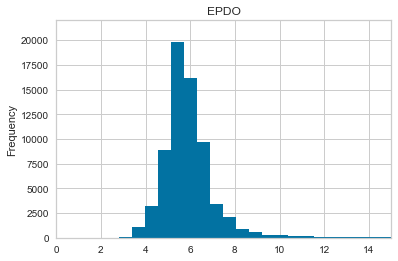

In [310]:
test['EPDO_Pred'].sort_index(ascending=True).plot(kind='hist',bins=100)
plt.title('EPDO')
plt.axis([0, 15, 0, 22000])
plt.show()

# 전체도로

In [164]:
reg = setup(data =train_final, target = 'EPDO')

,Description,Value
0,session_id,1434
1,Target,EPDO
2,Original Data,"(67361, 12)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(47152, 34)"


In [165]:
best_3 = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.7595,20.0468,4.4685,0.1011,1.0185,0.5833,1.0640
lightgbm,Light Gradient Boosting Machine,2.7356,20.0867,4.4726,0.0997,1.0055,0.6055,0.2240
ridge,Ridge Regression,2.7857,20.4911,4.5177,0.0814,1.0277,0.5944,0.0220
lr,Linear Regression,2.7858,20.4923,4.5178,0.0813,1.0278,0.5945,0.4410
lar,Least Angle Regression,2.7858,20.4923,4.5178,0.0813,1.0278,0.5945,0.0230
br,Bayesian Ridge,2.7855,20.4911,4.5177,0.0813,1.0277,0.5938,0.0760
en,Elastic Net,2.7965,20.6689,4.5372,0.0735,1.0306,0.5880,0.0270
omp,Orthogonal Matching Pursuit,2.8005,20.6897,4.5398,0.0722,1.0309,0.5913,0.0230
lasso,Lasso Regression,2.8003,20.7053,4.5410,0.0721,1.0318,0.5868,0.0250
rf,Random Forest Regressor,2.7839,22.0322,4.6841,0.0123,1.0448,0.6912,3.4800


In [166]:
exp_name = setup(data = train_final, fold=10, target = 'EPDO')
lgbm = create_model('lightgbm')
evaluate_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7264,16.9158,4.1129,0.0791,1.0068,0.6208
1,2.6750,16.6136,4.0760,0.0453,1.0053,0.6166
2,2.7601,21.1728,4.6014,0.0919,1.0057,0.6193
3,2.6766,20.4961,4.5273,0.1219,0.9979,0.5952
4,2.7271,20.2903,4.5045,0.0629,1.0051,0.6079
5,2.7566,19.0547,4.3652,0.1404,1.0024,0.6080
6,2.6895,18.0538,4.2490,0.0854,0.9999,0.6002
7,2.7409,22.7715,4.7719,0.1405,0.9986,0.6269
8,2.7120,16.8190,4.1011,0.1452,1.0000,0.6074
9,2.7563,23.1667,4.8132,0.1051,1.0031,0.6059


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# R2 향상용

In [286]:
reg = setup(data =train_exam11, target = 'EPDO',fold=20, iterative_imputation_iters = 50000, session_id = 10)

,Description,Value
0,session_id,10
1,Target,EPDO
2,Original Data,"(23738, 15)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(16616, 37)"


In [287]:
best_3 = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3526,32.3268,5.6375,0.1307,0.5660,0.8242,0.0520
rf,Random Forest Regressor,3.3507,32.7150,5.6753,0.1159,0.5695,0.8287,1.5360
gbr,Gradient Boosting Regressor,3.3829,33.2824,5.7077,0.1117,0.5722,0.8410,0.4260
ridge,Ridge Regression,3.4268,34.0910,5.7783,0.0895,0.5832,0.8538,0.0125
lr,Linear Regression,3.4277,34.0987,5.7791,0.0892,0.5835,0.8539,0.0140
lar,Least Angle Regression,3.4283,34.0993,5.7793,0.0891,0.5833,0.8542,0.0130
br,Bayesian Ridge,3.4257,34.1142,5.7803,0.0889,0.5829,0.8538,0.0265
en,Elastic Net,3.4480,34.7193,5.8321,0.0724,0.5872,0.8653,0.0130
lasso,Lasso Regression,3.4503,34.7397,5.8340,0.0718,0.5874,0.8664,0.0130
omp,Orthogonal Matching Pursuit,3.4384,34.9176,5.8480,0.0675,0.5855,0.8556,0.0135


In [50]:
exp_name = setup(data = OH_train_final, fold=5, target = 'EPDO')
gbr = create_model('gbr')
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7940,18.4669,4.2973,0.0623,1.0354,0.5788
1,2.7490,16.4177,4.0519,0.0771,1.0338,0.5747
2,2.8447,21.9569,4.6858,0.0289,1.0439,0.5766
3,2.7686,17.7223,4.2098,0.0635,1.0349,0.5767
4,2.8923,25.5845,5.0581,0.0468,1.0378,0.5766
Mean,2.8097,20.0296,4.4606,0.0557,1.0372,0.5767
SD,0.0523,3.3282,0.3645,0.0165,0.0036,0.0013


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Numeric

In [56]:
reg = setup(data =train_numeric, target = 'EPDO', numeric_features =['SPD_LMT'])

,Description,Value
0,session_id,6990
1,Target,EPDO
2,Original Data,"(67361, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(47152, 5)"


In [57]:
best_3 = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.7909,20.7163,4.5401,0.0803,1.0287,0.5908,0.3890
ridge,Ridge Regression,2.7909,20.7163,4.5401,0.0803,1.0287,0.5908,0.0070
lar,Least Angle Regression,2.7909,20.7163,4.5401,0.0803,1.0287,0.5908,0.0070
br,Bayesian Ridge,2.7908,20.7163,4.5401,0.0803,1.0286,0.5909,0.0110
en,Elastic Net,2.7925,20.7503,4.5438,0.0789,1.0290,0.5905,0.0100
lasso,Lasso Regression,2.7958,20.7869,4.5478,0.0773,1.0301,0.5895,0.0100
gbr,Gradient Boosting Regressor,2.7828,20.8248,4.5512,0.0762,1.0263,0.5837,0.3310
lightgbm,Light Gradient Boosting Machine,2.7905,21.0550,4.5779,0.0648,1.0266,0.5929,0.2110
omp,Orthogonal Matching Pursuit,2.8088,21.0785,4.5793,0.0647,1.0329,0.6022,0.0080
llar,Lasso Least Angle Regression,2.9069,22.5351,4.7359,-0.0003,1.0640,0.5618,0.0070


In [59]:
exp_name = setup(data = train_numeric, fold=10, target = 'EPDO', numeric_features =['SPD_LMT'])
gbr = create_model('gbr')
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7869,19.3067,4.3939,0.0933,1.0239,0.5811
1,2.6896,16.3124,4.0389,0.1032,1.0180,0.5688
2,2.7826,20.9736,4.5797,0.0693,1.0332,0.5760
3,2.7281,18.6986,4.3242,0.0168,1.0229,0.5970
4,2.8203,20.0182,4.4742,0.1079,1.0287,0.5984
5,2.8115,23.5166,4.8494,0.0114,1.0244,0.5776
6,2.7659,19.7349,4.4424,0.0567,1.0237,0.5898
7,2.8045,19.2484,4.3873,0.0724,1.0302,0.5802
8,2.7397,20.0951,4.4828,0.0861,1.0254,0.5690
9,2.8108,23.7719,4.8756,0.1070,1.0283,0.5893


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…